# UBC Scientific Software Seminar

## August 10, 2016

Today's Agenda:

A tour of the SciPy stack:

1. Plotting with NumPy arrays and matplotlib
2. Linear algebra in SciPy
3. Data analysis in pandas

### The SciPy Stack

Scientific computing in Python is built a collection of Python packages known as the SciPy stack:

* [NumPy](http://www.numpy.org/) provides fast array computations
* [matplotlib](http://matplotlib.org/) is a plotting library
* [SciPy](http://scipy.org/) is a library of common mathematical/statistical functions and objects
* [pandas](http://pandas.pydata.org/) provides essential datatypes and tools for data analysis

Let's begin with NumPy and matplotlib. Recall, when using a package, we [import](https://docs.python.org/3/reference/import.html) it with the `import` keyword and access its functions/objects with the dot syntax.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Plotting functions with NumPy arrays and matplotlib

#### EXAMPLE

Plot the function $y = e^{-0.1 x^2} \cos(10x)$ on the interval $[-10,10]$.

See the [pyplot API documentation](http://matplotlib.org/api/pyplot_summary.html) to see a summary of the pyplot commands.

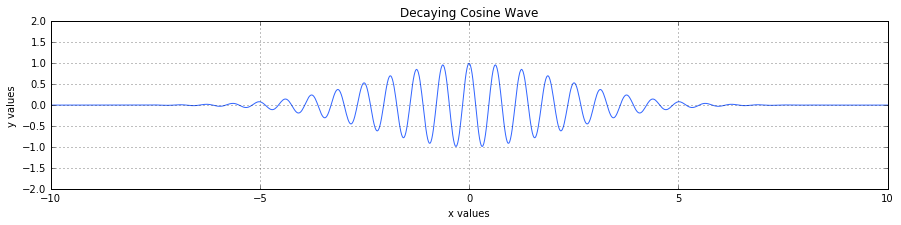

In [2]:
x = np.linspace(-10,10,1000)
y = np.exp(-0.1*x**2) * np.cos(10*x)

plt.figure(figsize=(15,3)) # Specifiy the size of the figure
plt.plot(x,y,color=(0.2,0.4,1)) # Specify the color as RGB tuple
plt.grid('on'), plt.xlim([-10,10]), plt.ylim([-2,2]) # Turn on the grid and set the x and y display limits
plt.xlabel('x values'), plt.ylabel('y values'), plt.title('Decaying Cosine Wave'); # Add labels and a title

#### EXAMPLE

Plot the parametric curve $x(t) = \cos 3t$ and $y(t) = \sin(2t)$ for $t \in [0,2 \pi]$.

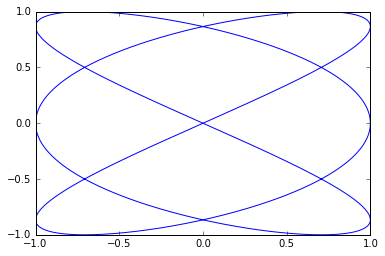

In [3]:
t = np.linspace(0,2*np.pi,1000)
x = np.cos(3*t)
y = np.sin(2*t)
plt.plot(x,y);

#### EXAMPLE

Plot the [butterfly curve](https://en.wikipedia.org/wiki/Butterfly_curve_%28transcendental%29) with variable parameters:

![x coordinate butterfly curve](https://wikimedia.org/api/rest_v1/media/math/render/svg/6a17a33d739ede62a269949b5bf551a875397102)
![y coordinate butterfly curve](https://wikimedia.org/api/rest_v1/media/math/render/svg/92e1ec07900777c282b5c379b0877906f4594727)

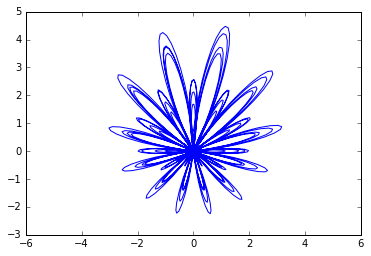

In [4]:
a = 12
k = 2
t = np.linspace(0,25,1000)
x = np.sin(t) * (np.exp(np.cos(t)) - 2*np.cos(a*t) - np.sin(t/12)**k)
y = np.cos(t) * (np.exp(np.cos(t)) - 2*np.cos(a*t) - np.sin(t/12)**k)
plt.plot(x,y)
plt.axis('equal')
plt.show()

#### EXAMPLE

Plot the degree 1, 3, and 5 Taylor series of $\sin x$ on the interval $[-3,3]$. Recall, the Taylor series of $\sin x$ is

$$
\sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \cdots
$$

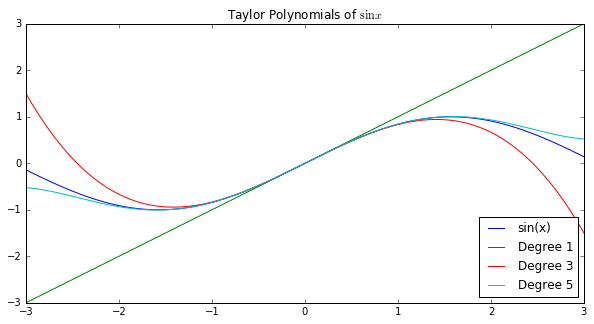

In [5]:
# Degree 1 T1(x) = x
# Degree 3 T3(x) = x - x^3 / 6
# Degree 5 T3(x) = x - x^3 / 3! + x^5 / 5!
x = np.linspace(-3,3,1000)
y = np.sin(x)
y1 = x
y3 = y1 - x**3 / (3*2*1)
y5 = y3 + x**5 / (5*4*3*2*1)

plt.figure(figsize=(10,5))
plt.plot(x,y,x,y1,x,y3,x,y5)
plt.title('Taylor Polynomials of $\sin x$')
plt.legend(['sin(x)','Degree 1', 'Degree 3','Degree 5'],loc=4);

### 2. Linear algebra with SciPy

See the [SciPy documentation](http://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html) for a summary of the linear algebra functions and objects provided by SciPy. As usual, we need to import the package before we use it:

In [6]:
import scipy.linalg as la

Before we get started, we need to emphasize the [difference between NumPy arrays and NumPy matrices](http://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html#numpy-matrix-vs-2d-numpy-ndarray). A NumPy array is an array of numbers and operations are always computed elementwise!

In [7]:
A = np.array([[1,2],[3,4]]) # Create a NumPy array
A

array([[1, 2],
       [3, 4]])

In [8]:
type(A)

numpy.ndarray

In [9]:
A * A # Compute the square of each element in the array

array([[ 1,  4],
       [ 9, 16]])

In [10]:
M = np.matrix([[1,2],[3,4]]) # Create a NumPy matrix
M

matrix([[1, 2],
        [3, 4]])

In [11]:
type(M)

numpy.matrixlib.defmatrix.matrix

In [12]:
M * M # Compute matrix multiplication

matrix([[ 7, 10],
        [15, 22]])

Always be aware of the dataype we're working with!

#### EXAMPLE

Find the determinant, eigenvalues and eigenvectors of the matrix $A = \begin{bmatrix} 1 & 2 & 1 \\ 4 & 2 & -3 \\ 0 & -5 & -1 \end{bmatrix}$.

In [13]:
A = np.matrix([[1,2,1],[4,2,-3],[0,-5,-1]])
A

matrix([[ 1,  2,  1],
        [ 4,  2, -3],
        [ 0, -5, -1]])

In [14]:
type(A)

numpy.matrixlib.defmatrix.matrix

In [15]:
la.det(A) # Compute the determinant

-29.0

In [16]:
evals, evecs = la.eig(A) # Compute eigenvalues and eigenvectors
print("Eigenvalues of A:", "\n\n", np.real(evals))
print()
print("Eigenvectors of A:", "\n\n", evecs)

Eigenvalues of A: 

 [ 5.43436462  1.16120709 -4.5955717 ]

Eigenvectors of A: 

 [[-0.21277719  0.61090902 -0.33351363]
 [-0.7715384  -0.31411793  0.55040399]
 [ 0.59954513  0.72671872  0.76539147]]


Let's verify that $A v_1 = \lambda_1 v_1$ for the first eigenpair $(\lambda_1,v_1)$.

In [17]:
P = np.matrix(evecs) # The matrix of eigenvectors
P

matrix([[-0.21277719,  0.61090902, -0.33351363],
        [-0.7715384 , -0.31411793,  0.55040399],
        [ 0.59954513,  0.72671872,  0.76539147]])

In [18]:
v1 = P[:,0] # The first eigenvector
v1

matrix([[-0.21277719],
        [-0.7715384 ],
        [ 0.59954513]])

In [19]:
s = np.real(evals) # The array of eigenvalues
s

array([ 5.43436462,  1.16120709, -4.5955717 ])

In [20]:
s1 = s[0] # The first eigenvalue
s1

5.4343646192384165

Compute $A v_1$:

In [21]:
A * v1

matrix([[-1.15630886],
        [-4.19282097],
        [ 3.25814686]])

Now compute $\lambda_1 v_1$

In [22]:
s1 * v1

matrix([[-1.15630886],
        [-4.19282097],
        [ 3.25814686]])

Let's see the diagonlization of $A$:

In [23]:
D = np.matrix(np.diag(np.real(evals)))
D

matrix([[ 5.43436462,  0.        ,  0.        ],
        [ 0.        ,  1.16120709,  0.        ],
        [ 0.        ,  0.        , -4.5955717 ]])

In [24]:
P * D * P**(-1)

matrix([[  1.00000000e+00,   2.00000000e+00,   1.00000000e+00],
        [  4.00000000e+00,   2.00000000e+00,  -3.00000000e+00],
        [ -7.52114818e-16,  -5.00000000e+00,  -1.00000000e+00]])

Let's round the result to see the matrix $A$ more clearly:

In [25]:
np.round(P * D * P**(-1))

matrix([[ 1.,  2.,  1.],
        [ 4.,  2., -3.],
        [-0., -5., -1.]])

In [26]:
A

matrix([[ 1,  2,  1],
        [ 4,  2, -3],
        [ 0, -5, -1]])

#### EXAMPLE

Suppose $M$ is a 2 by 2 matrix with random entries sampled uniformly from $[0,1]$. How are the (real) eigenvalues of the symmetric matrix $A = M M^T$ distributed? Compute a random sample of such matrices and plot the eigenvalues in a scatter plot.

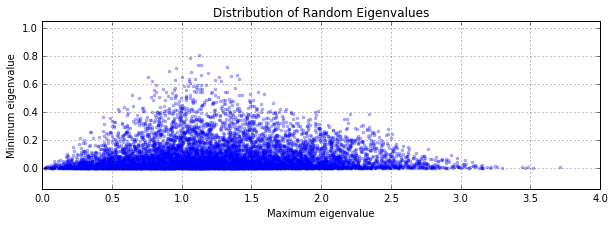

In [27]:
ev1 = np.array([])
ev2 = np.array([])

for _ in range(0,10000):
    M = np.matrix(np.random.random([2,2]))
    A = M * M.T
    evals, evecs = la.eig(A)
    evals = np.real(evals)
    ev1 = np.append(ev1,np.max(evals))
    ev2 = np.append(ev2,np.min(evals))

plt.figure(figsize=(10,3))
plt.plot(ev1,ev2,'.',alpha=0.3)
plt.axis('equal')
plt.grid('on')
plt.title('Distribution of Random Eigenvalues')
plt.xlabel('Maximum eigenvalue'), plt.ylabel('Minimum eigenvalue');

### 3. Data analysis with pandas

The main object we'll be dealing with in the pandas library is the [DataFrame](). The [documentation](http://pandas.pydata.org/) for pandas is extensive. Check it out!

In [28]:
import pandas as pd

One of the great features of pandas is its robust I/O Tools. Check out the documentation for the [read_csv](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table) method. Let's import a `.csv` file containing weather data recorded at the Vancouver International Airport from 2010 to 2016.

In [29]:
wind = pd.read_csv('wind.csv')

In [30]:
type(wind)

pandas.core.frame.DataFrame

Now that we have the `.csv` file loaded as a pandas DataFrame, let's look at the data. The `.head()`, `.tail()` and `.info()` are always a great first step in exploring a dataset.

In [31]:
wind.head()

,Year,Month,Day,Hour,Pressure,Wind Direction,Wind Speed,Temperature
0,2010,1,1,0,100.87,E,22.0,5.5
1,2010,1,1,1,100.81,E,19.0,5.4
2,2010,1,1,2,100.77,E,26.0,5.7
3,2010,1,1,3,100.69,ESE,26.0,5.5
4,2010,1,1,4,100.58,ESE,26.0,5.8


In [32]:
wind.tail()

,Year,Month,Day,Hour,Pressure,Wind Direction,Wind Speed,Temperature
54774,2016,4,1,7,102.15,ENE,4.0,8.7
54775,2016,4,1,8,102.15,ESE,17.0,10.1
54776,2016,4,1,9,102.15,ESE,11.0,11.7
54777,2016,4,1,10,102.15,SE,10.0,13.5
54778,2016,4,1,11,102.15,SSW,13.0,13.4


In [33]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54779 entries, 0 to 54778
Data columns (total 8 columns):
Year              54779 non-null int64
Month             54779 non-null int64
Day               54779 non-null int64
Hour              54779 non-null int64
Pressure          54776 non-null float64
Wind Direction    53180 non-null object
Wind Speed        54777 non-null float64
Temperature       54777 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 3.3+ MB


We can select the columns of a DataFrame by the bracket notation `[ ]` with the column name.

In [34]:
wind['Wind Speed'].head(10)

0    22.0
1    19.0
2    26.0
3    26.0
4    26.0
5    19.0
6    13.0
7    19.0
8    22.0
9    30.0
Name: Wind Speed, dtype: float64

#### EXAMPLE

Plot the hourly temperature from April 2015 as line plot and the wind speed as a historgram.

As a first step, we can select the data from April 2015 with Boolean indexing:

In [35]:
april_wind = wind[(wind['Year'] == 2015) & (wind['Month'] == 4)]

In [36]:
april_wind.head()

,Year,Month,Day,Hour,Pressure,Wind Direction,Wind Speed,Temperature
45983,2015,4,1,0,102.03,W,13.0,8.3
45984,2015,4,1,1,102.08,NNW,8.0,7.2
45985,2015,4,1,2,102.11,WNW,17.0,6.8
45986,2015,4,1,3,102.14,WNW,16.0,6.7
45987,2015,4,1,4,102.17,WNW,13.0,5.5


Plotting the temperature and wind speed over April 2015 is as simple as as selecting the column and then chaining the `.plot()` method (which is built on top of matplotlib):

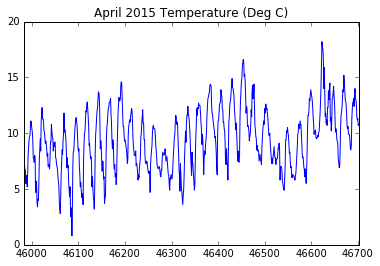

In [37]:
april_wind['Temperature'].plot(title='April 2015 Temperature (Deg C)')

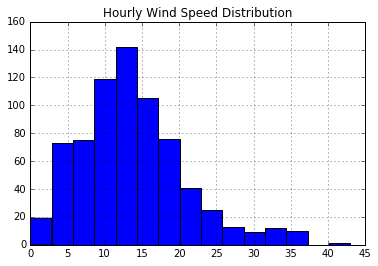

In [38]:
april_wind['Wind Speed'].hist(bins=15)
# .hist creates a matplotlib figure
# and so we can use pyplot commands on the current figure
plt.title('Hourly Wind Speed Distribution');

#### EXAMPLE

Plot a bar chart showing the number of hourly wind direction measurements (in the entire DataFrame) for each direction: E, ESE, SE, SSE, S, etc.

In [39]:
wind['Wind Direction'].unique()

array(['E', 'ESE', 'SE', 'SSE', 'S', 'ENE', 'NNW', 'WNW', 'SW', 'SSW', nan,
       'W', 'NW', 'N', 'WSW', 'NE', 'NNE'], dtype=object)

The [groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html) method splits the DataFrame into sub-DataFrames acording to the values in the specified column and then we can apply a function. For example, to simply count the number of measurements (rows) in each direction, we can enter:

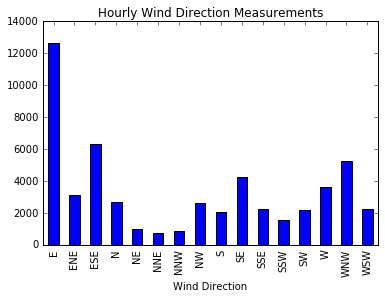

In [40]:
wind.groupby('Wind Direction').size().plot(kind='bar',title='Hourly Wind Direction Measurements')